# 3. **`economic_recession_analysis.ipynb`**
   - **Problem**: Identify years of negative GDP growth (recessions) by country.
   - **Dataset**: `world_gdp_data.csv`
   - **Tasks**: Calculate growth rates, flag negative values, visualize recession periods.
   - **Skills**: Applying functions (`apply`), filtering, time-series.
   - **Output**: `data/processed/economic_recession_analysis/recessions.csv`, plot PNG.

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
gdp = pd.read_csv("../data/raw/world_gdp_data.csv")
gdp.sample(5)

,country_name,indicator_name,1980,1981,1982,1983,1984,1985,1986,1987,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
11,Azerbaijan,Annual GDP growth (percent change),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.1,-3.1,0.2,1.5,2.5,-4.2,5.6,4.6,2.5,2.5
42,Cyprus,Annual GDP growth (percent change),5.9,3.1,6.3,5.3,8.8,4.7,3.6,7.1,...,3.4,6.6,5.7,5.6,5.5,-4.4,6.6,5.6,2.2,2.7
126,Pakistan,Annual GDP growth (percent change),6.9,6.2,7.6,6.8,4.0,8.7,6.4,5.8,...,3.8,4.1,4.6,6.1,3.1,-0.9,5.8,6.1,-0.5,2.5
51,El Salvador,Annual GDP growth (percent change),-8.6,-5.7,-6.3,1.5,1.3,0.6,0.2,2.5,...,2.4,2.5,2.3,2.4,2.5,-7.9,11.2,2.6,2.2,1.9
146,Senegal,Annual GDP growth (percent change),-0.8,5.1,7.8,-5.3,3.7,3.3,3.1,6.1,...,6.4,6.4,7.4,6.2,4.6,1.3,6.5,4.0,4.1,8.8


### 1. Growth Rate Calculation

For each country, calculate year-on-year GDP growth:

In [44]:
df_long = gdp.melt(
    id_vars=["country_name", "indicator_name"],
    var_name="year",
    value_name="gdp"
)

df_long["year"] = df_long["year"].astype(int)

df_long.sample(5)

,country_name,indicator_name,year,gdp
1755,Denmark,Annual GDP growth (percent change),1989,0.6
8403,Czech Republic,Annual GDP growth (percent change),2024,2.3
336,Senegal,Annual GDP growth (percent change),1981,5.1
5951,Germany,Annual GDP growth (percent change),2011,3.9
1413,Kazakhstan,Annual GDP growth (percent change),1987,NaN


### 2. Calculate Growth Rate

Group by country_name, sort by year, and calculate year-over-year GDP growth %.

In [45]:
df_long = df_long.sort_values(["country_name", "year"])
df_long["growth_rate"] = df_long.groupby("country_name")["gdp"].pct_change() * 100

df_long.sample(5)

C:\Users\hp\AppData\Local\Temp\ipykernel_10432\2929354203.py:2: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_long["growth_rate"] = df_long.groupby("country_name")["gdp"].pct_change() * 100


,country_name,indicator_name,year,gdp,growth_rate
1738,Cabo Verde,Annual GDP growth (percent change),1989,5.7,-5.0
7599,Zimbabwe,Annual GDP growth (percent change),2019,-6.3,-226.0
1223,Kazakhstan,Annual GDP growth (percent change),1986,NaN,NaN
344,Somalia,Annual GDP growth (percent change),1981,NaN,NaN
1000,Egypt,Annual GDP growth (percent change),1985,7.4,-7.5


### 3. Identify Recession Years

A recession = year where growth_rate < 0.

In [46]:
df_long["recession"] = df_long["growth_rate"] < 0

df_long.sample(5)

,country_name,indicator_name,year,gdp,growth_rate,recession
1091,Saint Lucia,Annual GDP growth (percent change),1985,12.6,57.500000,False
2847,Yemen,Annual GDP growth (percent change),1994,6.7,67.500000,False
23,Brazil,Annual GDP growth (percent change),1980,9.2,NaN,False
1512,Uzbekistan,Annual GDP growth (percent change),1987,NaN,NaN,False
7430,Bhutan,Annual GDP growth (percent change),2019,4.4,15.789474,False


### 4. Filter Recession Data

Keep only years with recession.

In [47]:
recessions = df_long[df_long["recession"]]
recessions.to_csv("../data/processed/economic_recession_analysis_recessions.csv", index=False)

recessions.sample(5)

,country_name,indicator_name,year,gdp,growth_rate,recession
7394,Turkmenistan,Annual GDP growth (percent change),2018,0.9,-80.851064,True
1182,Cyprus,Annual GDP growth (percent change),1986,3.6,-23.404255,True
4618,Gabon,Annual GDP growth (percent change),2004,1.1,-35.294118,True
7263,Czech Republic,Annual GDP growth (percent change),2018,3.2,-38.461538,True
7922,Philippines,Annual GDP growth (percent change),2021,5.7,-160.000000,True


### 5. Visualize Recessions

Plot GDP growth trends with shaded areas for recessions.

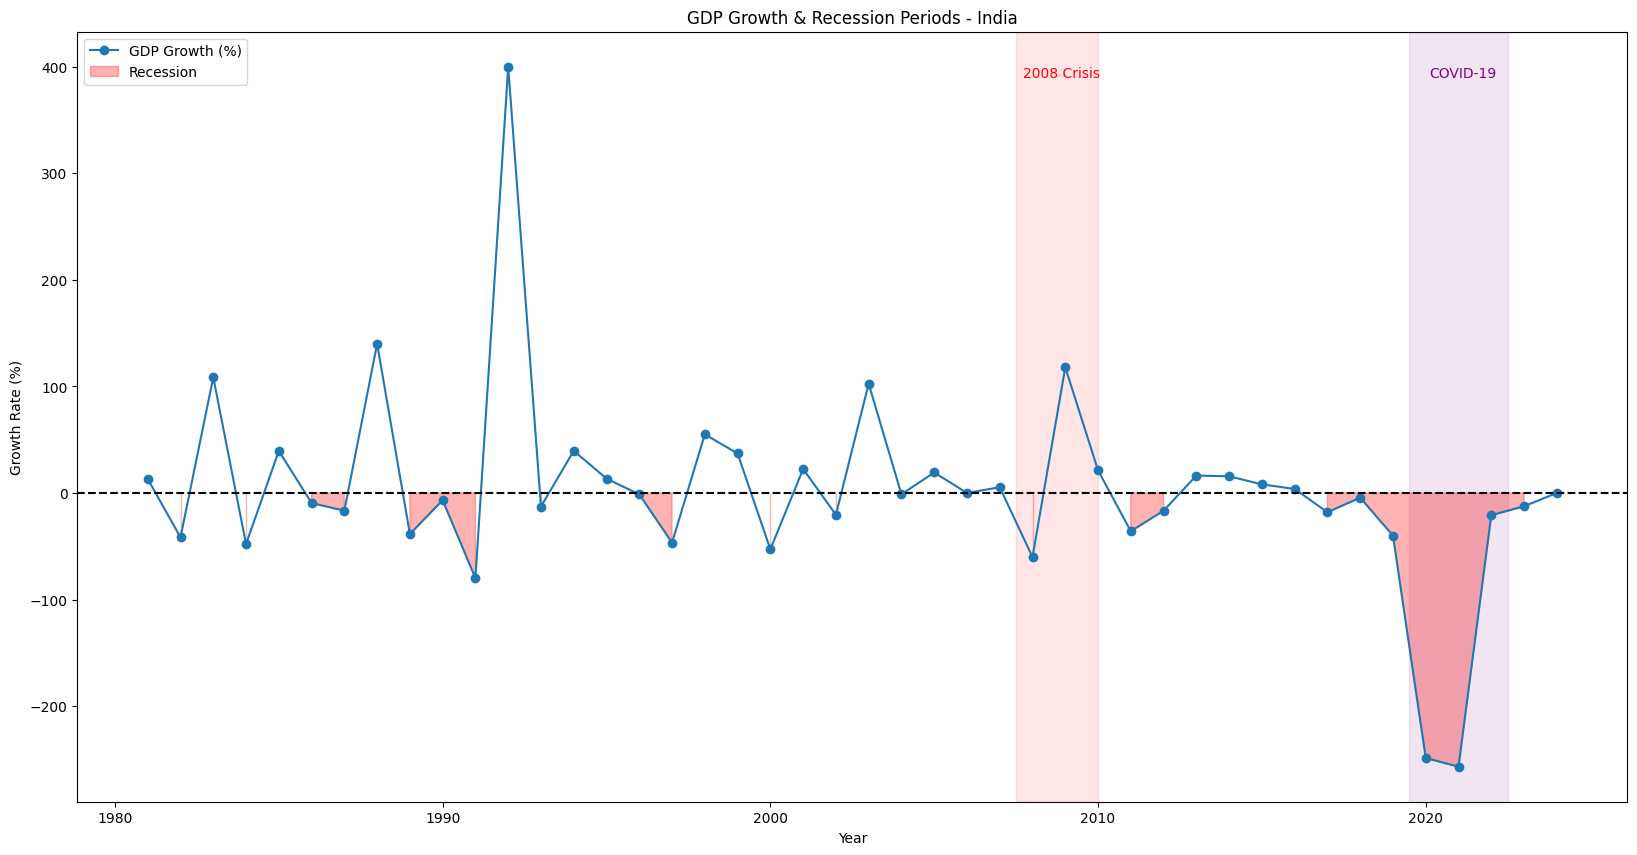

In [53]:
country = "India"  # example
country_data = df_long[df_long["country_name"] == country]

plt.figure(figsize=(20,10))
plt.plot(country_data["year"], country_data["growth_rate"], marker="o", label="GDP Growth (%)")

# Highlight recession years
plt.fill_between(
    country_data["year"],
    country_data["growth_rate"],
    where=country_data["recession"],
    color="red", alpha=0.3, label="Recession"
)

plt.axhline(0, color="black", linestyle="--")
plt.title(f"GDP Growth & Recession Periods - {country}")
plt.xlabel("Year")
plt.ylabel("Growth Rate (%)")
plt.legend()

# Highlight 2008 Crisis
plt.axvspan(2007.5, 2010, color='red', alpha=0.1, label='2008 Crisis')

# Highlight COVID-19
plt.axvspan(2019.5, 2022.5, color='purple', alpha=0.1, label='COVID-19')

plt.text(2007.7, plt.ylim()[1]*0.9, '2008 Crisis', color='red')
plt.text(2020.1, plt.ylim()[1]*0.9, 'COVID-19', color='purple')

plt.savefig("../data/processed/economic_recession_analysis_recession_plot.png")
plt.show()